In [1]:
from models import *
from functions import *
from plotting import *

import numpy as np
import cool_maps.plot as cplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cmocean.cm as cmo

In [2]:
dates = ('2024-11-06', '2024-11-06')
depth = 1000
lon_min = -77
lon_max = -60
lat_min = 36
lat_max = 45

extent = (lat_min, lon_min, lat_max, lon_max)

In [3]:
espc = ESPC()
espc.load()
espc.subset(dates, extent, depth)
espc.z_interpolated_data = interpolate_depth(espc.subset_data)
espc.z_interpolated_data = calculate_magnitude(espc.z_interpolated_data)
espc.z_interpolated_data = espc.z_interpolated_data.isel(time=0)

Loading ESPC data...
Start time (UTC): 2024-11-12 21:46:31.066323+00:00
Done.
End time (UTC): 2024-11-12 21:46:31.561140+00:00
Runtime: 0:00:00.494817

ESPC: Subsetted data.

ESPC: Interpolating depth...
Start time (UTC): 2024-11-12 21:46:31.739871+00:00
Done.
End time (UTC): 2024-11-12 21:47:35.732415+00:00
Runtime: 0:01:03.992544

ESPC: Calculating magnitude...
Start time (UTC): 2024-11-12 21:47:35.739930+00:00
Done.
End time (UTC): 2024-11-12 21:47:35.827315+00:00
Runtime: 0:00:00.087385



In [4]:
cmems = CMEMS()
cmems.load()
cmems.subset(dates, extent, depth)
cmems.z_interpolated_data = interpolate_depth(cmems.subset_data)
cmems.z_interpolated_data = calculate_magnitude(cmems.z_interpolated_data)
cmems.z_interpolated_data = cmems.z_interpolated_data.isel(time=0)

Loading CMEMS data...
Start time (UTC): 2024-11-12 21:47:35.944231+00:00


INFO - 2024-11-12T21:47:36Z - Dataset version was not specified, the latest one was selected: "202406"
INFO - 2024-11-12T21:47:36Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-11-12T21:47:39Z - Service was not specified, the default one was selected: "arco-geo-series"


Done.
End time (UTC): 2024-11-12 21:47:44.658751+00:00
Runtime: 0:00:08.714520

CMEMS: Subsetted data.

CMEMS: Interpolating depth...
Start time (UTC): 2024-11-12 21:47:44.826654+00:00
Done.
End time (UTC): 2024-11-12 21:49:19.282402+00:00
Runtime: 0:01:34.455748

CMEMS: Calculating magnitude...
Start time (UTC): 2024-11-12 21:49:19.282402+00:00
Done.
End time (UTC): 2024-11-12 21:49:19.289926+00:00
Runtime: 0:00:00.007524



ESPC Data

In [201]:
espc_subset = espc.subset_data.isel(time=0)

In [202]:
u = espc_subset.u
v = espc_subset.v
depth_range = np.arange(0, 1000, 1)

# u_filled = u.interpolate_na(dim="depth", method="linear").interpolate_na(dim="lat", method="linear").interpolate_na(dim="lon", method="linear")
# v_filled = v.interpolate_na(dim="depth", method="linear").interpolate_na(dim="lat", method="linear").interpolate_na(dim="lon", method="linear")

# u_filled = u_filled.chunk("auto")
# v_filled = v_filled.chunk("auto")

In [203]:
# u_interp = u_filled.interp(depth=depth_range, method="linear")
# v_interp = v_filled.interp(depth=depth_range, method="linear")

u_interp = u.interp(depth=depth_range, method="linear")
v_interp = v.interp(depth=depth_range, method="linear")

In [204]:
mag_espc = np.sqrt(u_interp**2 + v_interp**2)

CMEMS Data

In [205]:
cmems_subset = cmems.subset_data.isel(time=0)

In [206]:
u = cmems_subset.u
v = cmems_subset.v
depth_range = np.arange(0, 1000, 1)

# u_filled = u.interpolate_na(dim="depth", method="linear").interpolate_na(dim="lat", method="linear").interpolate_na(dim="lon", method="linear")
# v_filled = v.interpolate_na(dim="depth", method="linear").interpolate_na(dim="lat", method="linear").interpolate_na(dim="lon", method="linear")

# u_filled = u_filled.chunk("auto")
# v_filled = v_filled.chunk("auto")

In [207]:
# u_interp = u_filled.interp(depth=depth_range, method="linear")
# v_interp = v_filled.interp(depth=depth_range, method="linear")

u_interp = u.interp(depth=depth_range, method="linear")
v_interp = v.interp(depth=depth_range, method="linear")

In [208]:
mag_cmems = np.sqrt(u_interp**2 + v_interp**2)

In [209]:
mag_cmems = mag_cmems.interp(lon=espc_subset.lon, lat=espc_subset.lat).compute()

In [211]:
diff = mag_espc - mag_cmems

In [212]:
diff_sq = diff**2
avg = diff_sq.mean(dim="depth")
rmse = np.sqrt(avg)
rmse.load()

<xarray.DataArray (lat: 226, lon: 213)> Size: 385kB
array([[       nan,        nan,        nan, ..., 0.15343657, 0.12065271,
        0.12468694],
       [       nan,        nan,        nan, ..., 0.17010557, 0.14943961,
        0.14430949],
       [       nan,        nan,        nan, ..., 0.18706573, 0.17590146,
        0.16756089],
       ...,
       [       nan,        nan,        nan, ..., 0.03037163, 0.03058558,
        0.02378041],
       [       nan,        nan,        nan, ..., 0.03175692, 0.02963194,
        0.02517707],
       [       nan,        nan,        nan, ..., 0.04856261, 0.04121346,
        0.03280478]])
Coordinates:
  * lat       (lat) float64 2kB 36.0 36.04 36.08 36.12 ... 44.92 44.96 45.0
    time      datetime64[ns] 8B 2024-11-06
    time_run  datetime64[ns] 8B 2024-11-05T12:00:00
  * lon       (lon) float64 2kB -76.96 -76.88 -76.8 ... -60.16 -60.08 -60.0

In [213]:
lon2D, lat2D = np.meshgrid(rmse.lon, rmse.lat)

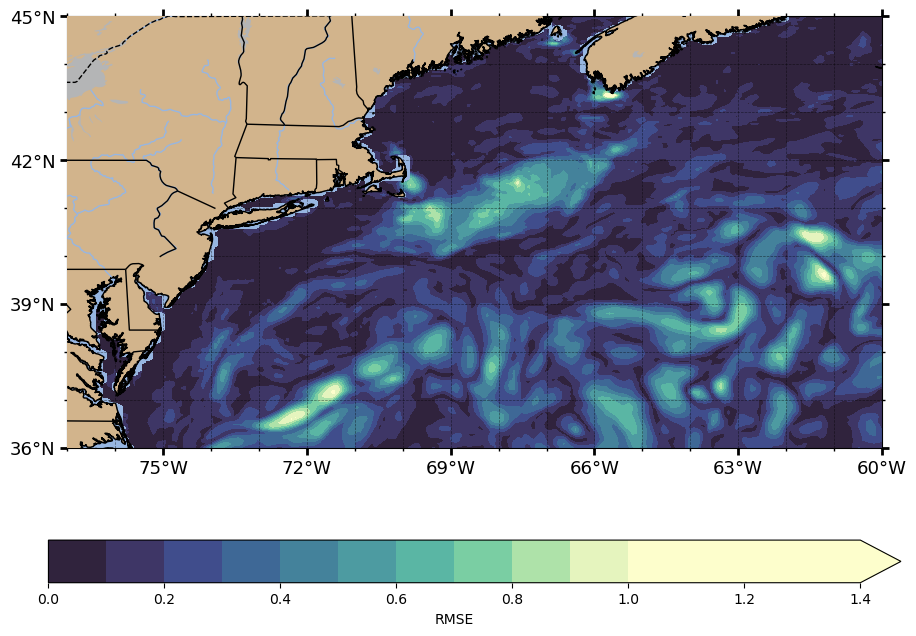

In [222]:
cplt.create([lon_min, lon_max, lat_min, lat_max], gridlines=True, proj=ccrs.PlateCarree())

contourf = plt.contourf(
        lon2D,
        lat2D,
        rmse,
        levels=15,
        cmap=cmo.deep_r,
        vmax=1.0,
        extend="max",
        transform=ccrs.PlateCarree(),
    )

colobar = plt.colorbar(contourf, label = "RMSE", orientation="horizontal")